In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
white_wine = pd.read_csv('winequality-white.csv', sep=';')
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# store wine type as an attribute
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

In [4]:
# bucket wine quality scores into quality labels
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
                                                     if value <=5 else 'medium'
                                                     if value <=7 else 'high')
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
                                                         if value <=5 else 'medium'
                                                         if value <=7 else 'high')

# change quality variable into categorical data type
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], 
                                     categories=['low', 'medium', 'high'])
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], 
                                       categories=['low', 'medium', 'high'])

In [5]:
# merge red and white wine datasets
wines = pd.concat([red_wine, white_wine])

# reshuffle to randomize
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

In [6]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


In [7]:
subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates',
                    'alcohol', 'volatile acidity', 'quality']
rs = round(red_wine[subset_attributes].describe(), 2)
ws = round(white_wine[subset_attributes].describe(), 2)

pd.concat([rs, ws], axis=1, keys=['Red Wine Statistics', 'White Wine Statustics'])

Red Wine Statistics                                          \
           residual sugar total sulfur dioxide sulphates  alcohol   
count             1599.00              1599.00   1599.00  1599.00   
mean                 2.54                46.47      0.66    10.42   
std                  1.41                32.90      0.17     1.07   
min                  0.90                 6.00      0.33     8.40   
25%                  1.90                22.00      0.55     9.50   
50%                  2.20                38.00      0.62    10.20   
75%                  2.60                62.00      0.73    11.10   
max                 15.50               289.00      2.00    14.90   

                                White Wine Statustics                       \
      volatile acidity  quality        residual sugar total sulfur dioxide   
count          1599.00  1599.00               4898.00              4898.00   
mean              0.53     5.64                  6.39               138.36   
std               0.18     0.81                  5.07                42.50   
min               0.12     3.00                  0.60                 9.00   
25%               0.39     5.00                  1.70               108.00   
50%               0.52     6.00                  5.20               134.00   
75%               0.64     6.00                  9.90               167.00   
max               1.58     8.00                 65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

# Univariate Analysis

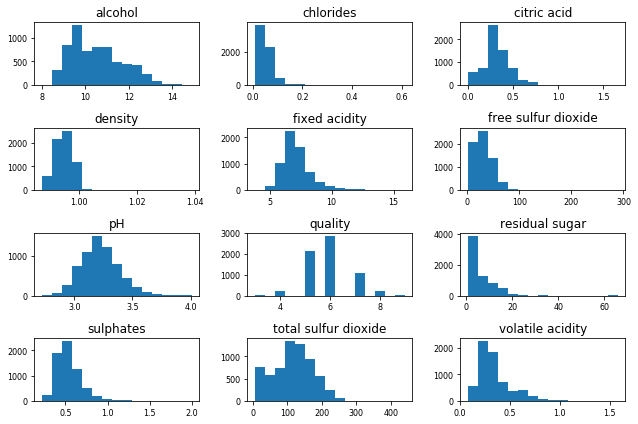

In [8]:
wines.hist(bins=15, linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False);
plt.tight_layout(rect=(0, 0, 1.5, 1.5));

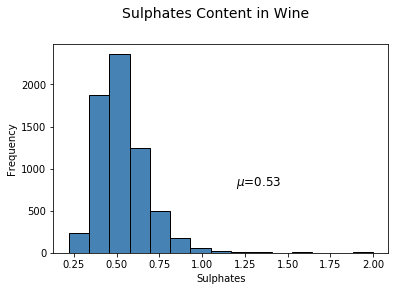

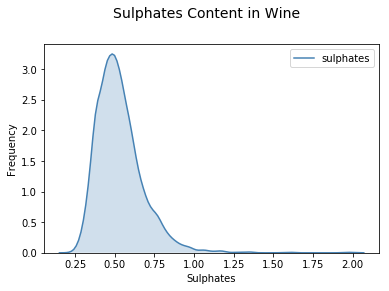

In [9]:
# Histogram
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$='+str(round(wines['sulphates'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(wines['sulphates'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)
                                    

# Density Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency") 
sns.kdeplot(wines['sulphates'], ax=ax1, shade=True, color='steelblue')

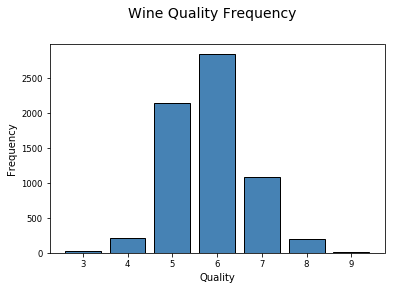

In [10]:
# Bar Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Wine Quality Frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Quality")
ax.set_ylabel("Frequency") 
w_q = wines['quality'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
        edgecolor='black', linewidth=1)

# Multivariate Analysis

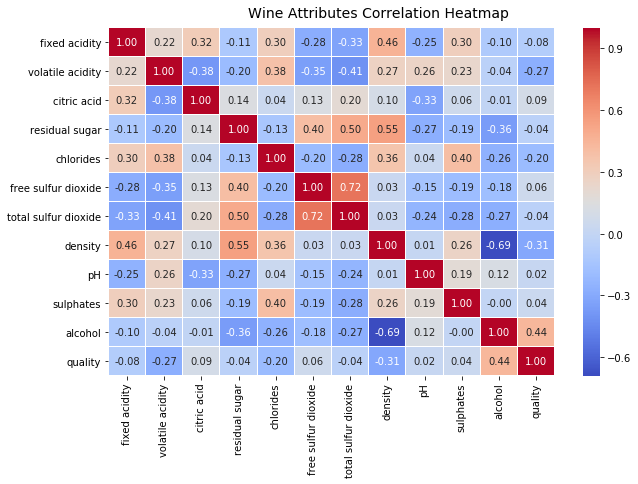

In [11]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = wines.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

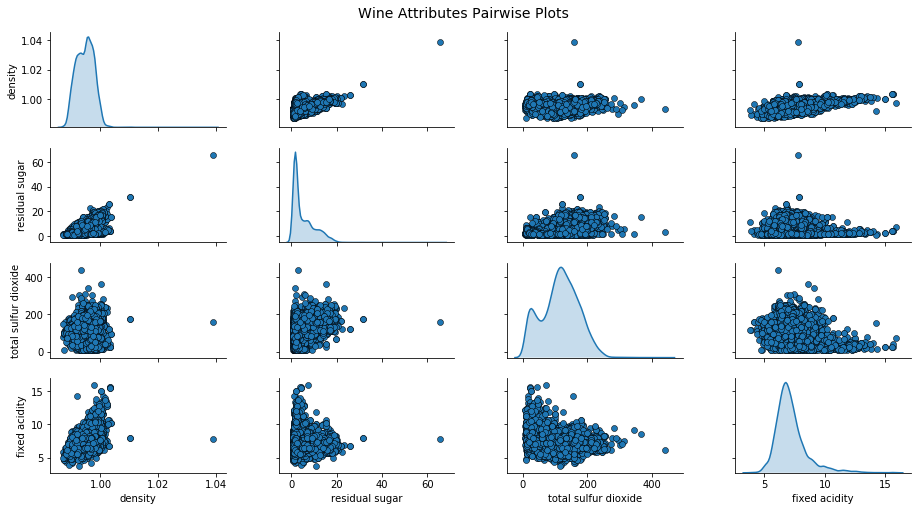

In [12]:
# Pair-wise Scatter Plots
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
pp = sns.pairplot(wines[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

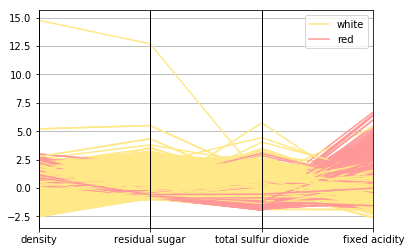

In [13]:
# Scaling attribute values to avoid few outiers
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
subset_df = wines[cols]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, wines['wine_type']], axis=1)
final_df.head()

# plot parallel coordinates
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_df, 'wine_type', color=('#FFE888', '#FF9999'))

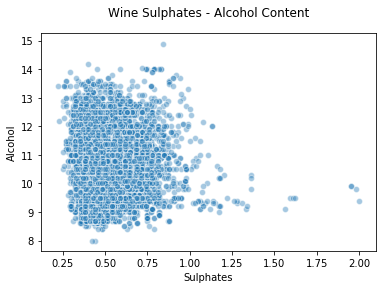

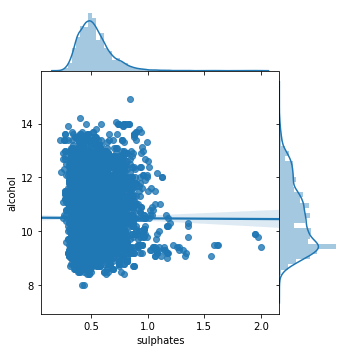

In [14]:
# Scatter Plot
plt.scatter(wines['sulphates'], wines['alcohol'],
            alpha=0.4, edgecolors='w')

plt.xlabel('Sulphates')
plt.ylabel('Alcohol')
plt.title('Wine Sulphates - Alcohol Content',y=1.05)


# Joint Plot
jp = sns.jointplot(x='sulphates', y='alcohol', data=wines,
                   kind='reg', space=0, size=5, ratio=4)

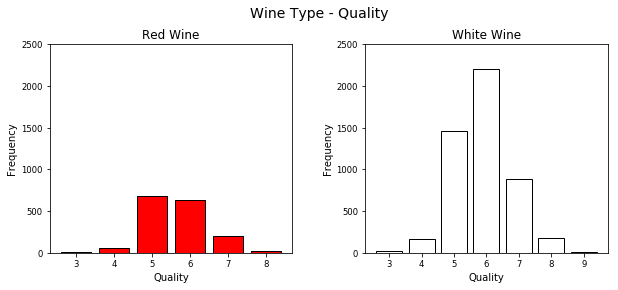

In [15]:
# Using subplots or facets along with Bar Plots
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Wine Type - Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
# red wine - wine quality
ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency") 
rw_q = red_wine['quality'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 2500])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red', 
               edgecolor='black', linewidth=1)

# white wine - wine quality
ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency") 
ww_q = white_wine['quality'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='white', 
               edgecolor='black', linewidth=1)

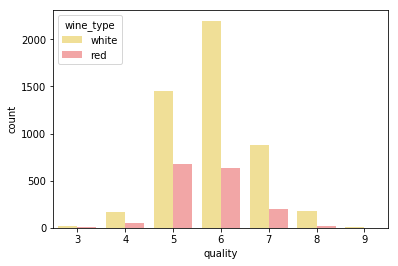

In [16]:
# Multi-bar Plot
cp = sns.countplot(x="quality", hue="wine_type", data=wines, 
                   palette={"red": "#FF9999", "white": "#FFE888"})

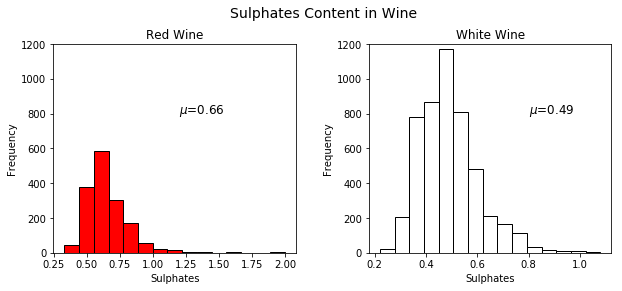

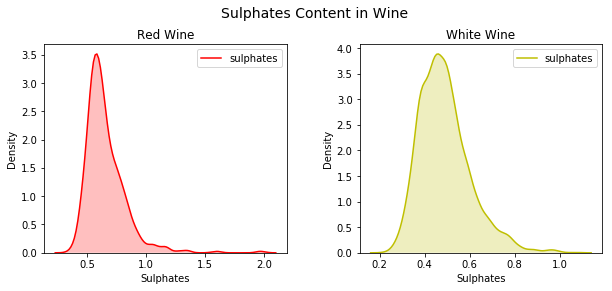

In [18]:
# facets with histograms
fig = plt.figure(figsize = (10,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 1200])
ax1.text(1.2, 800, r'$\mu$='+str(round(red_wine['sulphates'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['sulphates'], color='red', bins=15,
                                     edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 1200])
ax2.text(0.8, 800, r'$\mu$='+str(round(white_wine['sulphates'].mean(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['sulphates'], color='white', bins=15,
                                     edgecolor='black', linewidth=1)


# facets with density plots
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Density") 
sns.kdeplot(red_wine['sulphates'], ax=ax1, shade=True, color='r')

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Density") 
sns.kdeplot(white_wine['sulphates'], ax=ax2, shade=True, color='y');

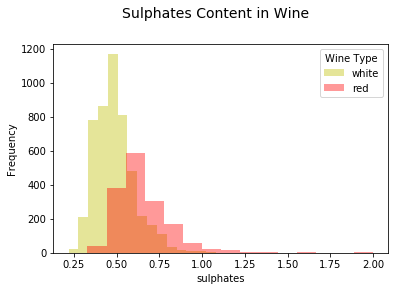

In [19]:
# Using multiple Histograms 
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency") 

g = sns.FacetGrid(wines, hue='wine_type', palette={"red": "r", "white": "y"})
g.map(sns.distplot, 'sulphates', kde=False, bins=15, ax=ax)
ax.legend(title='Wine Type')
plt.close(2)

Text(0, 0.5, 'Wine Alcohol %')

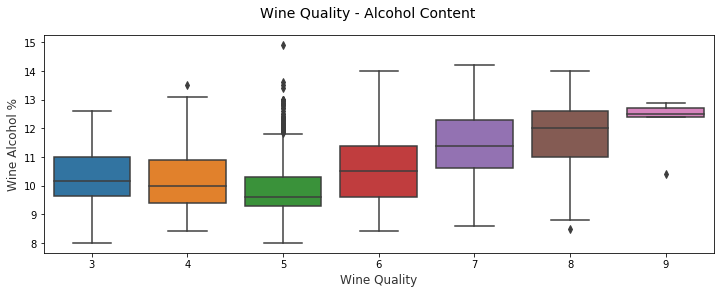

In [20]:
# Box Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="quality", y="alcohol", data=wines,  ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

Text(0, 0.5, 'Wine Sulphates')

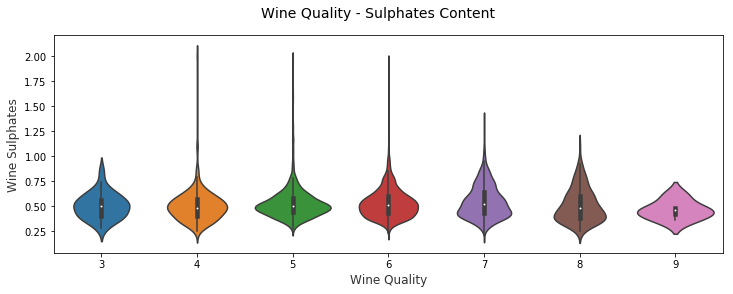

In [21]:
# Violin Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Sulphates Content', fontsize=14)

sns.violinplot(x="quality", y="sulphates", data=wines,  ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Sulphates",size = 12,alpha=0.8)